In [46]:
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model, metrics
from pprint import pprint
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split, KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))

(506, 13)


In [4]:
# Métricas de evaluación.
metricas = {'MAE':  'neg_mean_absolute_error',
            'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
            'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
            'R2' :'r2'}
            

### 1) PARTICIÓN EXTERNA DE DATOS

In [5]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(404, 13)
(102, 13)


### 2-5) ENTRENAMIENTO

In [6]:
# 2) Extracción de características
#No necesario no estámos trabajando con imagnes
# 3) Selección de atributos



array([[1.50234e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.49480e+02, 2.49100e+01],
       [6.27390e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.95620e+02, 8.47000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [7]:
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [17]:
# 5) Construcción del algoritmo de aprendizaje.
k = 12
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

In [21]:
# 5.1) Validación cruzada interna

# Extraer MEAN +- STD del coeficiente de determinación (R2) para un cross validation de 5 bolsas aleatorias y semilla en 42
r2_cv_results = cross_val_score(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42))
print("cross_val_R2:   %0.4f +/- %0.4f" % (r2_cv_results.mean() , r2_cv_results.std()))



cross_val_R2:   0.7261 +/- 0.1065


In [19]:
print(r2_cv_results)

{'fit_time': array([0.00099611, 0.00104237, 0.00105071, 0.00090361, 0.00214434]), 'score_time': array([0.00250697, 0.00215244, 0.00113225, 0.00150251, 0.00324368]), 'test_MAE': array([-3.32875419, -3.24210265, -3.45710257, -3.20069402, -2.30943423]), 'test_RMSE': array([-5.22991236, -4.77386492, -6.07769489, -4.41703997, -3.20098826]), 'test_MAPE': array([-15.78336529, -13.941805  , -14.6171022 , -14.5951631 ,
       -11.97347908]), 'test_R2': array([0.61530205, 0.76796163, 0.58422895, 0.81757279, 0.84537973])}


In [22]:
# Extraer métricas MAE, MSE, RMSE y MAPE en un cross validation para 5 bolsas aleatorias y semilla en 42
metrics_cv_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)


print("cross_val_test_MAE:   %0.4f +/- %0.4f" % (np.mean(metrics_cv_results['test_MAE']), np.std(metrics_cv_results['test_MAE'])))
print("cross_val_test_RMSE:   %0.4f +/- %0.4f" % (np.mean(metrics_cv_results['test_RMSE']), np.std(metrics_cv_results['test_RMSE'])))
print("cross_val_test_MAPE:   %0.4f +/- %0.4f" % (np.mean(metrics_cv_results['test_MAPE']), np.std(metrics_cv_results['test_MAPE'])))


cross_val_test_MAE:   -3.1076 +/- 0.4086
cross_val_test_RMSE:   -4.7399 +/- 0.9490
cross_val_test_MAPE:   -14.1822 +/- 1.2538


In [24]:
# Extraer las predicciones del cross validation de 5 bolsas aleatorias y semilla en 42
y_pred = cross_val_predict(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42))

print(y_pred)

[11.44367099 19.81700467 22.68715488 11.09576363 18.39883607 23.33367011
 21.26250262 25.47931907 11.19955604 12.94570481 22.01938209 26.18560007
 30.0460621  13.55079085 36.62191054 16.9688652  20.45062146 26.18565712
 19.74162817 24.5668365  11.28724201 19.87653729 23.53349521 21.4155484
 25.85234797 31.45780245 21.66227391 38.93020145 18.41111062 23.10292191
 18.10698956 19.74012486 15.68183159 13.27646148 21.21189656 27.77031066
 27.04238669 17.54499622 18.02066491 25.33420425 24.92324319 20.45808186
 10.85732897 22.61035447 22.0941567  14.18940086 17.15330255 41.62718008
 14.18480701 16.23199633 25.49173957 20.46167657 21.76451422 21.59275996
 18.78130439 17.14509077 28.01438755 10.61877517 24.51598608 20.24164531
 20.63776317 21.66093264 26.82040858 19.23912777 42.95919054 14.67998487
 16.63445754 20.50944856 16.68289624 19.86617987 21.6823512  30.02922378
 18.69363996 20.44209755 20.97131763 26.58747406 29.20103624 23.95838996
 15.60815451  9.59277254 11.71341515 25.77427334 29.

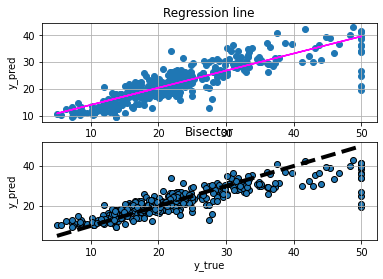

In [25]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz y la recta de regresión
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

# Visualiza la bisetriz y recta de regresión
report_regression_graphics(y_training,y_pred)

In [26]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_stdr, y_training)

### 6-10) PREDICCIÓN

In [ ]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 

In [27]:
# 8) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [28]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

MAE:  2.6634
MSE: 22.6163
RMSE: 4.7557
R2:   0.6916


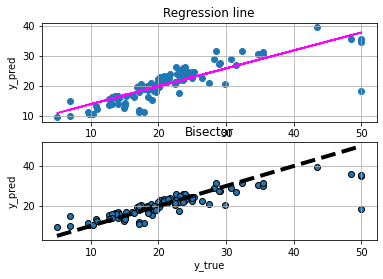

In [29]:
# 10) Evaluación del modelo sobre el conjunto de test
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

# Visualización de resultados
report_regression_graphics(y_testing, y_pred_test)

### ACTIVIDAD EXTRA

#### Entrenar el mejor modelo posible con el algoritmo KNN y comparar el resultado con el modelo OLS en test

In [36]:
from sklearn.model_selection import GridSearchCV
# Definir parámetros de búsqueda
lista_c = [1] + list(range(5,200,5))  #Lista con valores de C que quiero validar. Comienza en 1, termina en 200 con saltos de 5 números.

parametros= {'n_neighbors': np.arange(1,15) , 
             'weights':('uniform', 'distance'),
             'metric':('euclidean', 'manhattan','cosine')
             }

# Aplicar el algoritmo de búsqueda
grid_SVR = GridSearchCV(estimator=KNeighborsRegressor(), #tipo de algoritmo SVR
                        param_grid = parametros, #parametros que queremos evaluar
                        cv = 5,     #Validación cruzada
                        n_jobs=-1, 
                        scoring='r2')

# Entrenar el modelo
grid_SVR.fit(X_stdr, y_training)

# Extraer los mejores parámetros
grid_SVR.best_params_

#print(grid_SVR.best_params_)

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

In [40]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SVR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SVR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SVR.best_params_)



bestiter = grid_SVR.best_index_
mean_r2=grid_SVR.cv_results_['mean_test_score'][bestiter]
std_r2=grid_SVR.cv_results_['std_test_score'][bestiter]

print(f'best R2: {mean_r2} +- {std_r2}')

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(metric='euclidean', n_neighbors=2, weights='distance')

 The best score across ALL searched params:
 0.8223351721007702

 The best parameters across ALL searched params:
 {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
mean: 0.8223351721007702 +- 0.03973415143094505


In [ ]:
# Entrenar cada algoritmo y comparar los resultados (a nivel cuantitativo y cualitativo) sobre el conjunto de test
???

In [60]:
# OPTIMIZACION de HYPERPARAMETROS
parameters = {'OLS':{'normalize':(True, False)},
                'Lasso' : {'alpha':(0.1,0.2,0.3,0.4,0.5,1,5,6,7,8,9,10,50,100)},
                'Ridge' : {'alpha':(0.1,0.2,0.3,0.4,0.5,1,5,6,7,8,9,10,50,100)},
                'KNN' : {'n_neighbors': np.arange(1,15) , 
                         'weights':('uniform', 'distance'),
                         'metric':('euclidean', 'manhattan','cosine')}
                }

In [54]:
#Algoritmos
algs = { 'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(random_state=42),
         'Ridge': linear_model.Ridge(random_state=42),
         'KNN': KNeighborsRegressor()   }


In [61]:
from termcolor import colored
model ={}

for name, _ in algs.items():
    print(colored('\n Algoritmo: ' + name, 'blue'))
    score = make_scorer(r2_score)
    model_cv = GridSearchCV(algs[name], parameters[name], 
                            scoring=score,
                            cv=KFold(n_splits=5, shuffle=True, random_state=42),
                            #cv=5,
                            return_train_score=True)
    model[name] = model_cv.fit(X_stdr,y_training)

    #cv_res = model[name].cv_results_

    print("The best estimator across ALL searched params:",model[name].best_estimator_)
    print("The best score across ALL searched params:",model[name].best_score_)
    print("The best parameters across ALL searched params:",model[name].best_params_)



 Algoritmo: OLS
The best estimator across ALL searched params: LinearRegression(normalize=True)
The best score across ALL searched params: 0.7184784187192006
The best parameters across ALL searched params: {'normalize': True}

 Algoritmo: Lasso
The best estimator across ALL searched params: Lasso(alpha=0.1, random_state=42)
The best score across ALL searched params: 0.7119836127926977
The best parameters across ALL searched params: {'alpha': 0.1}

 Algoritmo: Ridge
The best estimator across ALL searched params: Ridge(alpha=5, random_state=42)
The best score across ALL searched params: 0.7191218164937666
The best parameters across ALL searched params: {'alpha': 5}

 Algoritmo: KNN
The best estimator across ALL searched params: KNeighborsRegressor(metric='euclidean', n_neighbors=2, weights='distance')
The best score across ALL searched params: 0.7468932048085164
The best parameters across ALL searched params: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
